In [1]:
# Importing pandas and numpy
import pandas as pd
import numpy as np

#Reading in the dataset using pandas
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',header=None)

In [2]:
# Assigning values of features and responses to X and y
X,y = df.values[:,:3] ,df.values[:, 3] 


print (X)

[[30 64  1]
 [30 62  3]
 [30 65  0]
 [31 59  2]
 [31 65  4]
 [33 58 10]
 [33 60  0]
 [34 59  0]
 [34 66  9]
 [34 58 30]
 [34 60  1]
 [34 61 10]
 [34 67  7]
 [34 60  0]
 [35 64 13]
 [35 63  0]
 [36 60  1]
 [36 69  0]
 [37 60  0]
 [37 63  0]
 [37 58  0]
 [37 59  6]
 [37 60 15]
 [37 63  0]
 [38 69 21]
 [38 59  2]
 [38 60  0]
 [38 60  0]
 [38 62  3]
 [38 64  1]
 [38 66  0]
 [38 66 11]
 [38 60  1]
 [38 67  5]
 [39 66  0]
 [39 63  0]
 [39 67  0]
 [39 58  0]
 [39 59  2]
 [39 63  4]
 [40 58  2]
 [40 58  0]
 [40 65  0]
 [41 60 23]
 [41 64  0]
 [41 67  0]
 [41 58  0]
 [41 59  8]
 [41 59  0]
 [41 64  0]
 [41 69  8]
 [41 65  0]
 [41 65  0]
 [42 69  1]
 [42 59  0]
 [42 58  0]
 [42 60  1]
 [42 59  2]
 [42 61  4]
 [42 62 20]
 [42 65  0]
 [42 63  1]
 [43 58 52]
 [43 59  2]
 [43 64  0]
 [43 64  0]
 [43 63 14]
 [43 64  2]
 [43 64  3]
 [43 60  0]
 [43 63  2]
 [43 65  0]
 [43 66  4]
 [44 64  6]
 [44 58  9]
 [44 63 19]
 [44 61  0]
 [44 63  1]
 [44 61  0]
 [44 67 16]
 [45 65  6]
 [45 66  0]
 [45 67  1]
 [45

In [3]:
#  Print shape of X
print (X.shape)

(306, 3)


In [4]:
# Print shape of y
print(y.shape)

(306,)


In [5]:
# Imports KNN Algorithm, training/testing split function and metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn import metrics



In [6]:
# Splitting data into training set and test set using size of 0.4 - 40% for testing, 60% for training.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

# Prints shape of the training and testing set for X values
print(X_train.shape)
print(X_test.shape)

(183, 3)
(123, 3)


In [7]:
#Printing shape of training and testing set for y values

print(y_train.shape)
print(y_test.shape)

(183,)
(123,)


In [8]:
# Iterate through range of k= 1 to k= 90 and do KNN algorithm to predict on testing set. Add accuracy score of KNN algorithm for each
k_range = list(range(1, 90))
scores = [] # Array where accuracy scores will be added for each k value
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k) # Initializes KNN algorithm 
    knn.fit(X_train, y_train) # Fits model with training data set
    y_pred = knn.predict(X_test) # Makes prediction on testing data set
    scores.append(metrics.accuracy_score(y_test, y_pred)) #Adds accuracy value of K value used to scores array

In [9]:
print (scores)
# Finds location of where best score is
m = max(scores)
best_k = scores.index(max(scores)) + 1 #Plus 1 to account for index starting from 0
print (best_k)

[0.6422764227642277, 0.7642276422764228, 0.7560975609756098, 0.7479674796747967, 0.7642276422764228, 0.7886178861788617, 0.7642276422764228, 0.8211382113821138, 0.7804878048780488, 0.7886178861788617, 0.7723577235772358, 0.7886178861788617, 0.7804878048780488, 0.7886178861788617, 0.7804878048780488, 0.7886178861788617, 0.7804878048780488, 0.7804878048780488, 0.7804878048780488, 0.7886178861788617, 0.7886178861788617, 0.7967479674796748, 0.7967479674796748, 0.7967479674796748, 0.7967479674796748, 0.8048780487804879, 0.8048780487804879, 0.7967479674796748, 0.7886178861788617, 0.7967479674796748, 0.7886178861788617, 0.7967479674796748, 0.7967479674796748, 0.7886178861788617, 0.7886178861788617, 0.7886178861788617, 0.7886178861788617, 0.7886178861788617, 0.7886178861788617, 0.7804878048780488, 0.7886178861788617, 0.7804878048780488, 0.7804878048780488, 0.7804878048780488, 0.7804878048780488, 0.7723577235772358, 0.7804878048780488, 0.7804878048780488, 0.7804878048780488, 0.7723577235772358,

Text(0,0.5,'Accuracy')

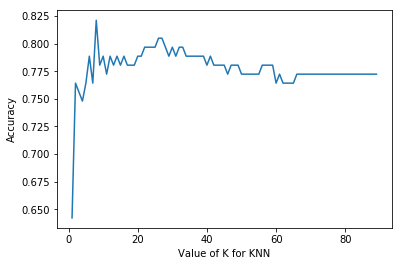

In [10]:
# Plotting the relationship between K and testing accuracy
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')

In [1]:
# Doing the KNN Algorithm using the best K value, as found above
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train) # Fiting model with training data
# Making prediction on testing set
y_pred = knn.predict(X_test)

#Comparing actual value response value(y_test) and predicted response value (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

NameError: name 'KNeighborsClassifier' is not defined

In [12]:
# Making a confusion matrix using actual response and predicted response values
y = metrics.confusion_matrix(y_test, y_pred)

# Initliazing values from matrix to variables
TP = y[0,0] # True Positive 
FN = y[1,0] # False Negative

FP = y[0,1] # False Positive
TN = y[1,1] # True Negative

# Printing out the Confusion Matrix
print (y)

[[95  0]
 [22  6]]


In [13]:
# Working out the accuracy score
accuracy =  ((TN + TP)/(TN + FN + FP + TP))
# Working out the error
error = 1 - accuracy
# True Positive Rate (Recall or Sensitivity)
true = TP/(TP + FN)
# False Positive Rate (Precision)
false = (TP/(FP + TP))

In [14]:
# Printing out the results from above
print ("Accuracy Score:", accuracy)
print ("Error:", error)
print ("True Positive:", true)
print("False Positive:", false)

Accuracy Score: 0.8211382113821138
Error: 0.17886178861788615
True Positive: 0.811965811965812
False Positive: 1.0
